Imports and Configuration

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from glob import glob
import pickle

IMAGE_FOLDER = "E:/Coding/Advanced ML/train_data"
IMAGE_EXTENSION = "*.jpg"
IMG_SIZE = (64, 64)
N_COMPONENTS = 20
PCA_CACHE_FILE = "pca_results.pkl"

Image Loading and Preprocessing

In [7]:
def load_images(image_paths, img_size=IMG_SIZE):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_path}. Skipping.")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        images.append(img.flatten())
    return np.array(images)

PCA Calculation with Caching

In [8]:
def process_images(image_paths, img_size=IMG_SIZE, n_components=N_COMPONENTS, cache_file=PCA_CACHE_FILE):
    if os.path.exists(cache_file):
        print("Loading PCA results from cache...")
        with open(cache_file, 'rb') as f:
            return pickle.load(f)
    else:
        print("Processing images and performing PCA...")
        image_data = load_images(image_paths, img_size)

        if image_data.size == 0:
            print("No valid images found. Check your image folder and extensions.")
            return None

        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(image_data)

        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(scaled_data)

        df_pca = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(n_components)])

        with open(cache_file, 'wb') as f:
            pickle.dump((df_pca, scaler, pca), f)
        return df_pca, scaler, pca


Execution and Display

In [ ]:
image_paths = glob(os.path.join(IMAGE_FOLDER, IMAGE_EXTENSION))
pca_results = process_images(image_paths)

if pca_results is not None:
    df_pca, scaler, pca = pca_results
    print(df_pca.head())

Processing images and performing PCA...


Plotting

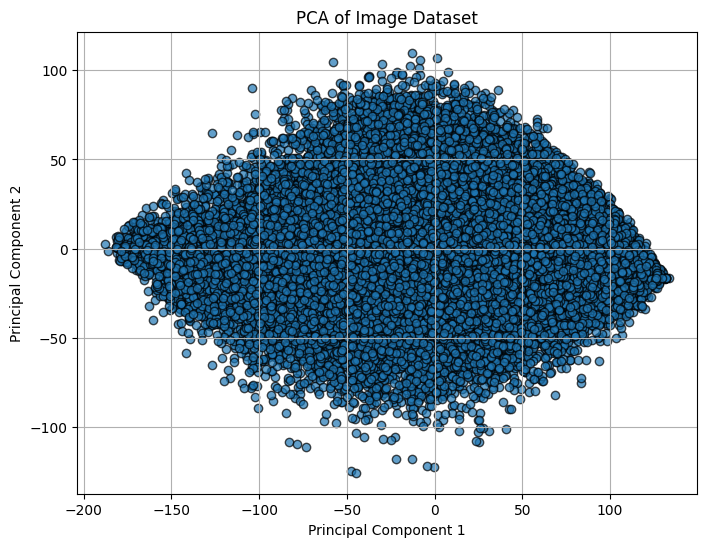

In [ ]:
if pca_results is not None:  # Check if PCA was successful
    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, edgecolors='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA of Image Dataset")
    plt.grid()
    plt.show()